In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
ptb_data = pd.read_csv('ptb_data.csv')
ptb_data.info()
y_sample = ptb_data['DurationSecs']
x_sample = ptb_data.drop(['DurationSecs'],axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112027 entries, 0 to 112026
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Anonymize 1PlayerId      111995 non-null  object 
 1   Away Score               112027 non-null  int64  
 2   Club Id                  112027 non-null  object 
 3   DurationSecs             112027 non-null  float64
 4   EventName                112027 non-null  object 
 5   Half                     112027 non-null  int64  
 6   Home Score               112027 non-null  int64  
 7   MatchId                  112027 non-null  int64  
 8   OfficialId               112027 non-null  int64  
 9   Opposition Id            112027 non-null  object 
 10  OppPossessionSecs        112027 non-null  float64
 11  OppScore                 112027 non-null  float64
 12  Player Id                112027 non-null  float64
 13  PositionId               112027 non-null  float64
 14  Poss

# Outliers: PTB Speed

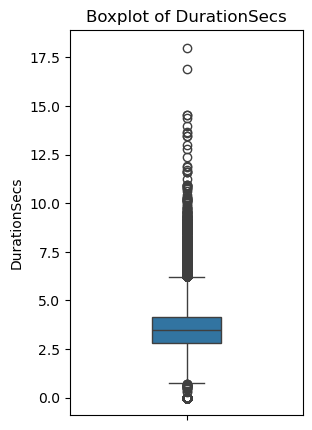

In [76]:
plt.figure(figsize=(3, 5)) 
sns.boxplot(data=ptb_data, y='DurationSecs', width=0.3)
plt.title('Boxplot of DurationSecs')
plt.show()

In [52]:
ptb_data['PTB Defence'].value_counts()

PTB Defence
1.0    17096
0.0     6939
Name: count, dtype: int64

# Checking For Missing Values: 

In [69]:
ptb_data = pd.read_csv('ptb_data.csv')
missing_values = ptb_data.isnull().sum()
features_with_missing_values = missing_values[missing_values > 0]
features_with_missing_values

Anonymize 1PlayerId           32
Total Involved Tacklers       36
PTB Defence                87992
Raw Tackle Number              1
dtype: int64

In [58]:
df_encoded = ptb_data.drop(columns = ['PTB Defence'])
# df_encoded.info()

df_encoded = pd.get_dummies(df_encoded, columns=['Anonymize 1PlayerId', 'EventName', 'Club Id', 'Opposition Id', 'PTB Contest', 
                                         'PTB Ultimate Outcome', 'WeatherConditionName', 'OfficialId'], drop_first=True)


df_encoded = df_encoded.dropna()

df_encoded[df_encoded.select_dtypes(include=['bool']).columns] = df_encoded.select_dtypes(include=['bool']).astype(int)


In [12]:
# Assuming `df` is your DataFrame and `column_name` is the column you're checking for outliers
Q1 = ptb_data['DurationSecs'].quantile(0.25)
Q3 = ptb_data['DurationSecs'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ptb_data[(ptb_data['DurationSecs'] < lower_bound) | (ptb_data['DurationSecs'] > upper_bound)]

# Count of outliers
num_outliers = outliers.shape[0]
print(f"Number of outliers: {num_outliers}")

Number of outliers: 2187


In [10]:
from scipy.stats import boxcox

ptb_data['DurationSecs_log'] = np.log1p(ptb_data['DurationSecs'])


# Checking For Outliers:

In [77]:
outlier_counts = {} 

for column in ptb_data.columns:
    if ptb_data[column].dtype in ['float64', 'int64']:  # Only check numeric columns

        # To Skip binary and ID variables
        unique_values = ptb_data[column].dropna().unique()
        if len(unique_values) == 2 and set(unique_values).issubset({0, 1}):
            continue  
        elif 'Id' in column:
            continue
        
        Q1 = ptb_data[column].quantile(0.25)
        Q3 = ptb_data[column].quantile(0.75)
        IQR = Q3 - Q1
    
        # outlier bounds:
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        # Identifying outleirs:
        outliers = ptb_data[(ptb_data[column] < lower_bound) | (ptb_data[column] > upper_bound)]
    
        # Count of outliers
        num_outliers = outliers.shape[0]
        if num_outliers > 0:
            outlier_counts[column] = num_outliers  # Store the count in dict

# Print outlier counts for each feature
for col, count in outlier_counts.items():
    print(f"Outliers for {col}: {count}")

Outliers for Away Score: 1698
Outliers for DurationSecs: 2187
Outliers for Half: 117
Outliers for Home Score: 1021
Outliers for OppScore: 899
Outliers for Total Involved Tacklers: 42
Outliers for Score: 1068
Outliers for CurrentMargin: 7136


In [6]:
Q1 = ptb_data['DurationSecs'].quantile(0.25)
Q3 = ptb_data['DurationSecs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ptb_data = ptb_data[(ptb_data['DurationSecs'] >= lower_bound) & (ptb_data['DurationSecs'] <= upper_bound)]

In [ ]:
# HISTOGRAMS 

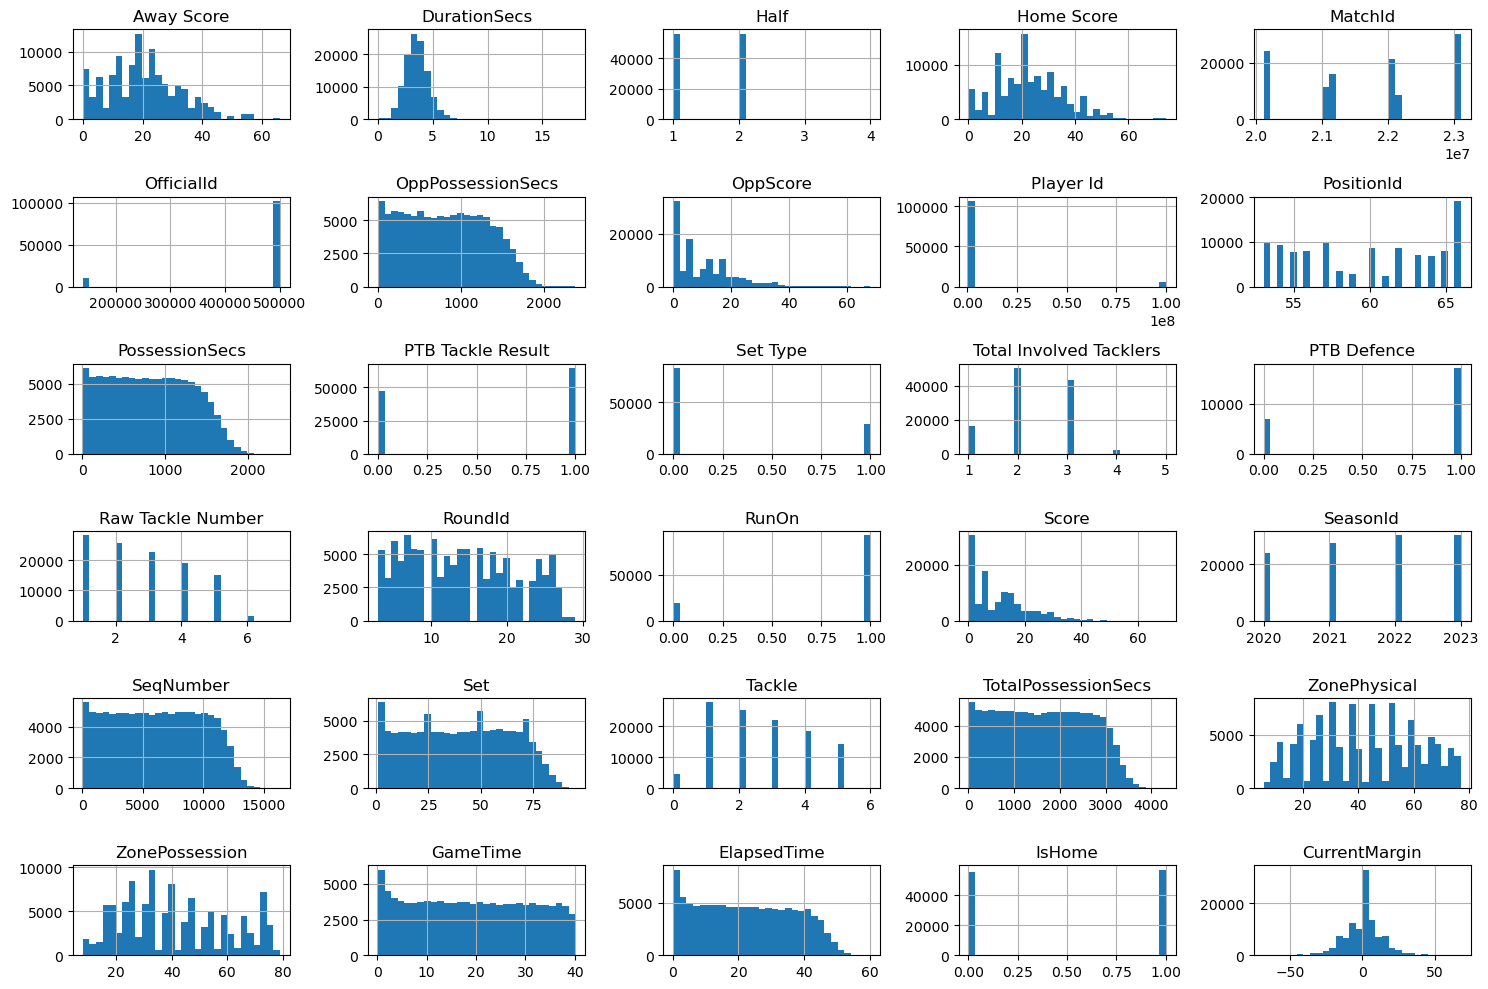

In [5]:
ptb_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

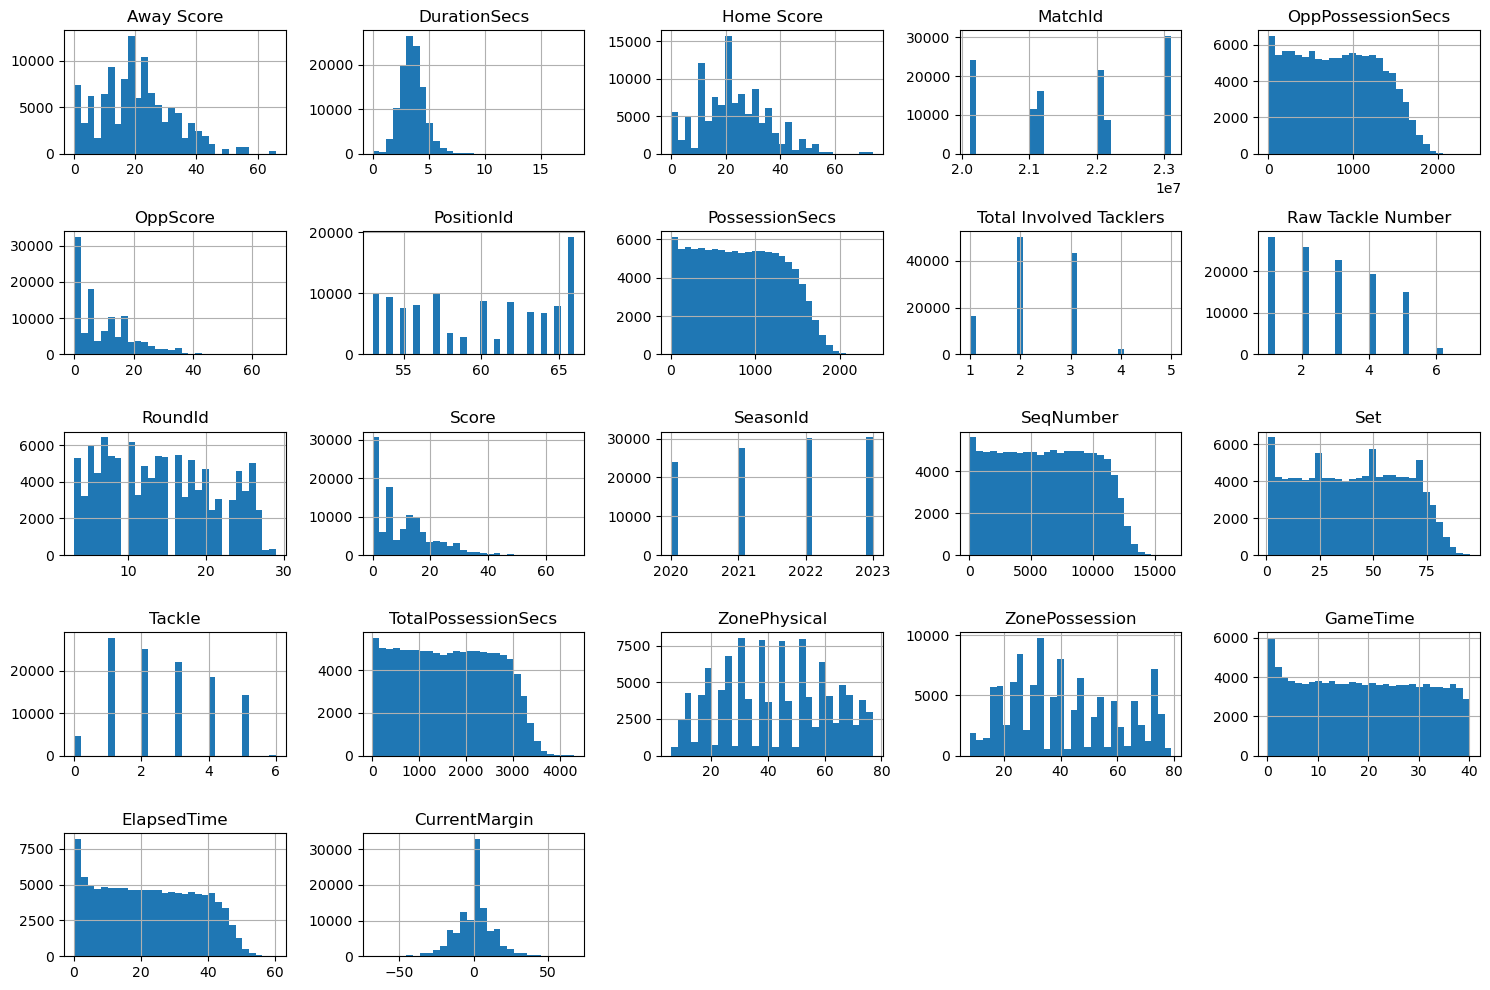

In [17]:
continuous_vars = ptb_data.select_dtypes(include=['float64', 'int64'])
continuous_vars = continuous_vars.drop(columns = ['Half', 'OfficialId', 'Player Id', 'PTB Tackle Result', 'Set Type', 'PTB Defence', 'RunOn', 'IsHome'])

# Plot histograms for continuous variables only
continuous_vars.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [26]:
contingency_table = pd.crosstab(ptb_data['EventName'], ptb_data['PTB Ultimate Outcome'])
print(contingency_table)

PTB Ultimate Outcome  Another PTB  Field goal attempt  Handover   Kick  \
EventName                                                                
PTB - fast                   4706                   5        59   1323   
PTB - neutral               72172                  44       712  14220   
PTB - slow                   6958                   8        46   1059   

PTB Ultimate Outcome  Opp ruck infringement  Other  Penalty attack  \
EventName                                                            
PTB - fast                               96     16              55   
PTB - neutral                          1508     92             581   
PTB - slow                              172     10              63   

PTB Ultimate Outcome  Penalty defence   Try  Turnover  
EventName                                              
PTB - fast                         42   165       306  
PTB - neutral                     563  2329      4059  
PTB - slow                         49   256       353 

In [ ]:
numerical_features = ['Away Score', 'Home Score', 'OppPossessionSecs', 'OppScore', 'PossessionSecs', 'Score', 'SeqNumber', 
                      'TotalPossessionSecs', 'Set', 'GameTime', 'ElapsedTime', 'CurrentMargin']

categorical_features = ['Anonymize 1PlayerId', 'Club Id', 'EventName', 'Half', 'MatchId', 'OfficialId', 'Opposition Id', 'Player Id', 
                        'PositionId', 'PTB Contest', 'PTB Tackle Result', 'Set Type', 'Total Involved Tacklers', 'PTB Defence', 'PTB Ultimate Outcome', 
                        'Raw Tackle Number', 'RoundId', 'RunOn', 'SeasonId', 'Tackle', 'WeatherConditionName', 'ZonePhysical', 'ZonePossession',
                        'IsHome']

# Time variable scatterplots: 

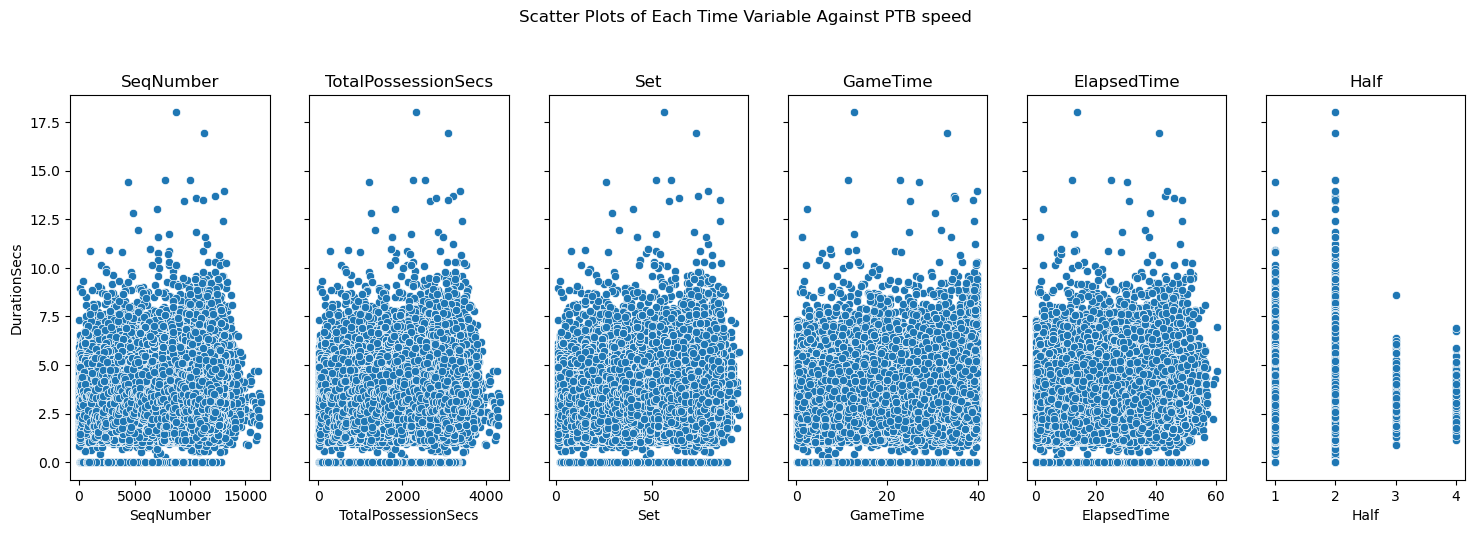

In [83]:
y = ptb_data['DurationSecs']

time_features = ['SeqNumber', 'TotalPossessionSecs', 'Set', 'GameTime', 'ElapsedTime', 'Half']

# columns = ['RoundId', 'SeasonId', 'WeatherConditionName', 'IsHome', 'CurrentMargin']

# X = ptb_data.drop(['DurationSecs'],axis = 1)

X = ptb_data[time_features]

# Set up the figure with a grid of subplots
num_vars = X.shape[1]
fig, axes = plt.subplots(1, num_vars, figsize=(num_vars * 3, 5), sharey=True)

# Loop over each variable in X and create a scatter plot
for i, column in enumerate(X.columns):
    sns.scatterplot(x=X[column], y=y, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    # axes[i].tick_params(axis='x', rotation=45) 

# Add a main title and adjust layout
fig.suptitle('Scatter Plots of Each Time Variable Against PTB speed', y=1.05)
plt.show()

# Time variable Boxplot: 

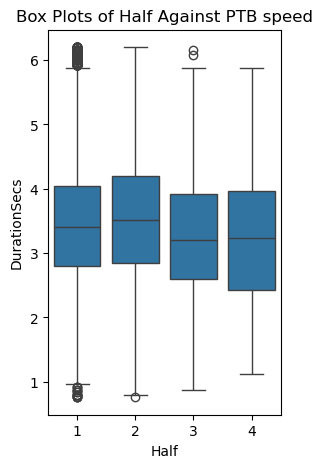

In [46]:
y = ptb_data['DurationSecs']
X = ptb_data[['Half']]

# Set up the figure with a grid of subplots
num_vars = X.shape[1]
fig, axes = plt.subplots(1, num_vars, figsize=(num_vars * 3, 5), sharey=True)

# Loop over each variable in X and create a scatter plot

sns.boxplot(x=X[column], y=y)
plt.title('Box Plots of Half Against PTB speed')
plt.show()

# Other Box/Scatter Plots

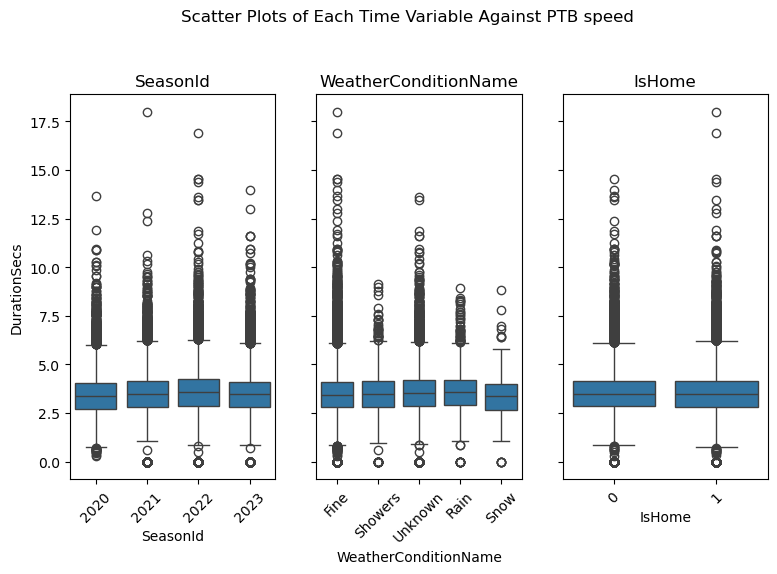

In [81]:
y = ptb_data['DurationSecs']

other_features = ['SeasonId', 'WeatherConditionName', 'IsHome']

# 'SeasonId', 'WeatherConditionName', 'IsHome',

X = ptb_data[other_features]

# Set up the figure with a grid of subplots
num_vars = X.shape[1]
fig, axes = plt.subplots(1, num_vars, figsize=(num_vars * 3, 5), sharey=True)

# Loop over each variable in X and create a scatter plot
for i, column in enumerate(X.columns):
    sns.boxplot(x=X[column], y=y, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45) 

# Add a main title and adjust layout
fig.suptitle('Scatter Plots of Each Time Variable Against PTB speed', y=1.05)
plt.show()

# Tackle/Set feature Scatterplots:

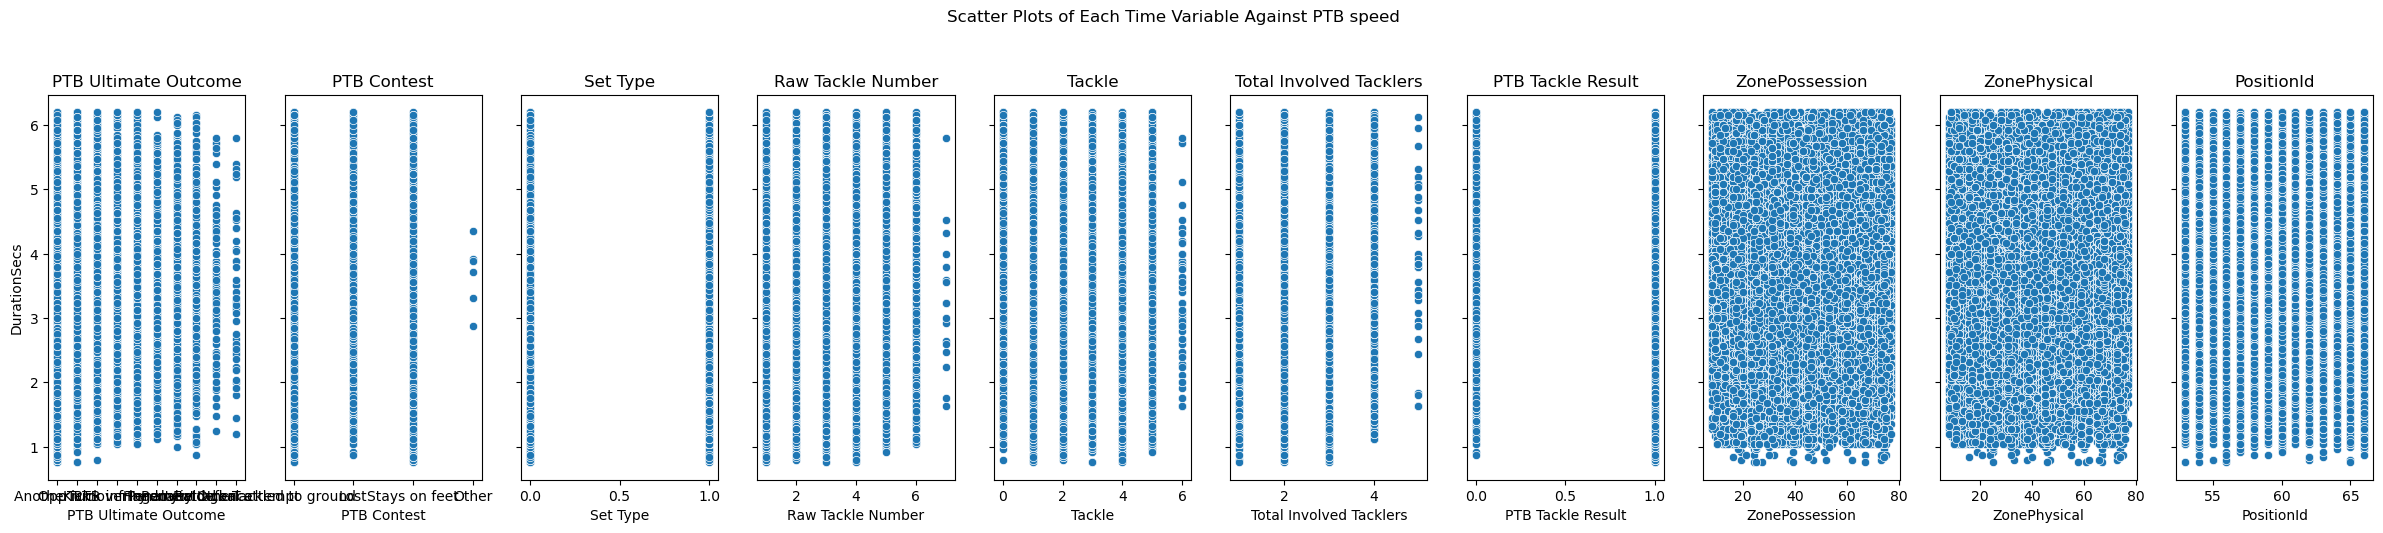

In [92]:
y = ptb_data['DurationSecs']

tackleSetFeatures = ['PTB Ultimate Outcome', 'PTB Contest', 'Set Type', 'Raw Tackle Number', 'Tackle', 'Total Involved Tacklers', 'PTB Tackle Result', 
                      'ZonePossession', 'ZonePhysical', 'PositionId']

X = ptb_data[tackleSetFeatures]

# Set up the figure with a grid of subplots
num_vars = X.shape[1]
fig, axes = plt.subplots(1, num_vars, figsize=(num_vars * 3, 5), sharey=True)

# Loop over each variable in X and create a scatter plot
for i, column in enumerate(X.columns):
    sns.scatterplot(x=X[column], y=y, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    # axes[i].tick_params(axis='x', rotation=45) 

# Add a main title and adjust layout
fig.suptitle('Scatter Plots of Each Time Variable Against PTB speed', y=1.05)
plt.show()

# Tackle/set feature Boxplots:

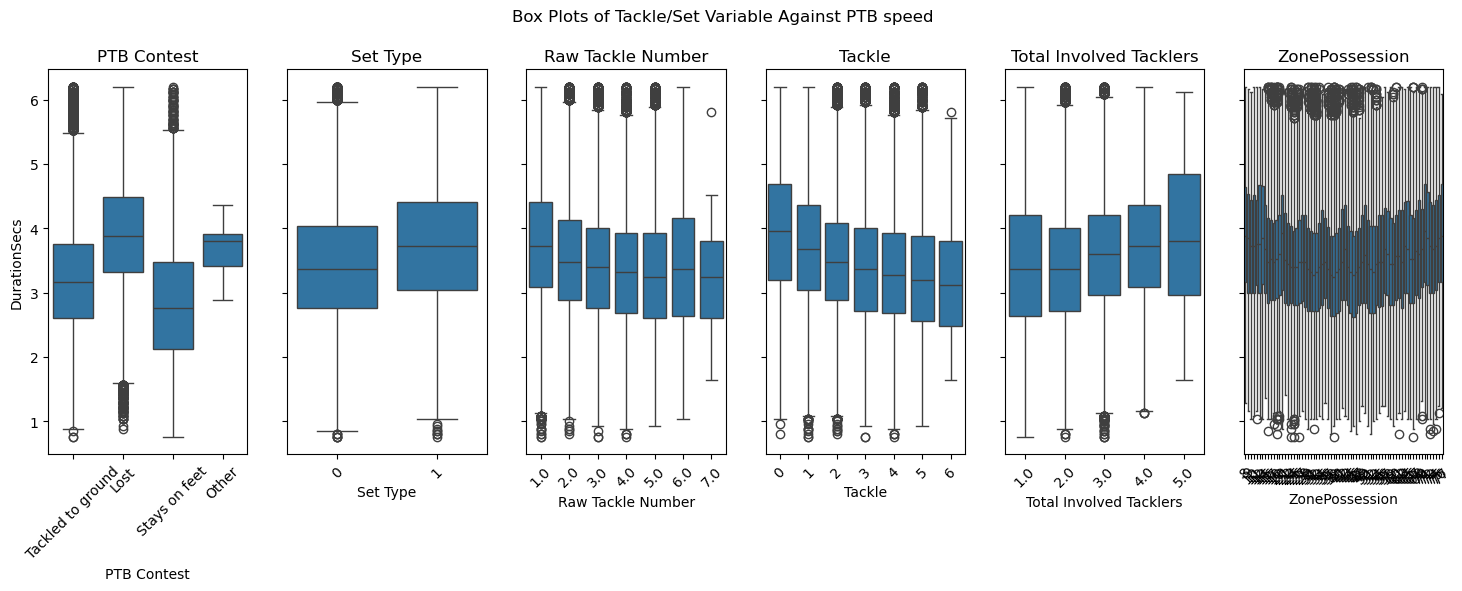

In [64]:
y = ptb_data['DurationSecs']

tackleSetFeatures = ['PTB Contest', 'Set Type', 'Raw Tackle Number', 'Tackle', 'Total Involved Tacklers', 'ZonePossession']

X = ptb_data[tackleSetFeatures]

# Set up the figure with a grid of subplots
num_vars = X.shape[1]
fig, axes = plt.subplots(1, num_vars, figsize=(num_vars * 3, 5), sharey=True)

# Loop over each variable in X and create a scatter plot
for i, column in enumerate(X.columns):
    sns.boxplot(x=X[column], y=y, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45) 

# Add a main title and adjust layout
fig.suptitle('Box Plots of Tackle/Set Variable Against PTB speed', y=1.0)
plt.show()

Text(0.5, 1.0, 'histogram of Half')

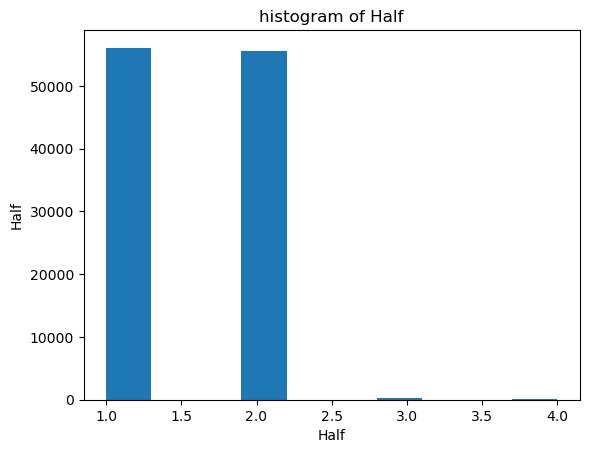

In [7]:
plt.hist("Half", data = ptb_data)
plt.xlabel("Half")
plt.ylabel("Half")
plt.title("histogram of Half")

In [15]:
(ptb_data['Half'] == 3).sum()

239

In [91]:
ptb_data['Club Id'].nunique()

17

In [93]:
ptb_data['Opposition Id'].nunique()

17

In [95]:
ptb_data['PTB Ultimate Outcome'].nunique()

10

In [125]:
ptb_data['Player Id'].nunique()

671

In [42]:
ptb_data['WeatherConditionName'].value_counts()

WeatherConditionName
Fine       78927
Unknown    25771
Showers     2381
Rain        2208
Snow         553
Name: count, dtype: int64

In [107]:
ptb_data['PTB Contest'].value_counts()

PTB Contest
Tackled to ground    58323
Lost                 47469
Stays on feet         6229
Other                    6
Name: count, dtype: int64

In [115]:
count = (ptb_data['Club Id'] == '5e03a19f4d014a2220665cfd56522d35').sum()
count

6638

# Missing Values: Boxplot of PTB defence

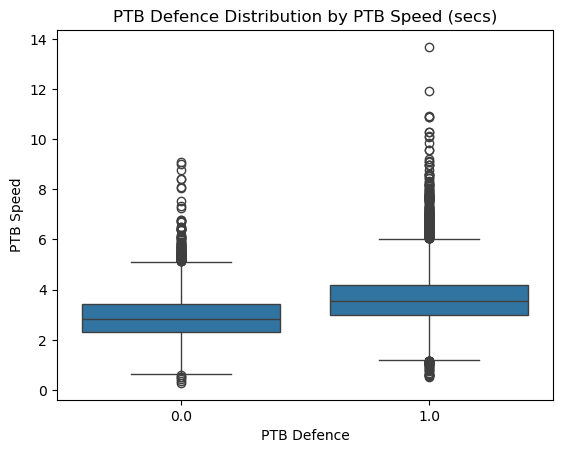

In [54]:
sns.boxplot(x='PTB Defence', y='DurationSecs', data=ptb_data)
plt.title('PTB Defence Distribution by PTB Speed (secs)')
plt.xlabel('PTB Defence')
plt.ylabel('PTB Speed')
plt.show()

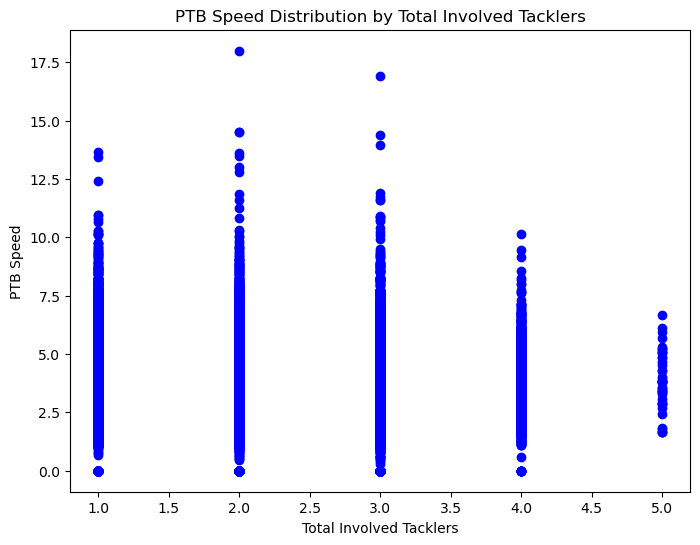

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(ptb_data['Total Involved Tacklers'], ptb_data['DurationSecs'], color='blue', marker='o')
plt.title('PTB Speed Distribution by Total Involved Tacklers')
plt.xlabel('Total Involved Tacklers')
plt.ylabel('PTB Speed')
plt.show()

In [49]:
averages = ptb_data.groupby('Total Involved Tacklers')['DurationSecs'].mean().reset_index()
averages

,Total Involved Tacklers,DurationSecs
0,1.0,3.557453
1,2.0,3.419076
2,3.0,3.599600
3,4.0,3.776373
4,5.0,3.861905


In [55]:
from scipy.stats import boxcox

ptb_data['ElapsedTime_boxcox'], lamda_value = boxcox(ptb_data['ElapsedTime'])




In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Exclude the dependent variable and any constant if added
X = df_encoded.drop(columns=['DurationSecs'])  # Replace 'DurationSecs' with your dependent variable

# Calculate VIF
vif_results = calculate_vif(X)

# Display VIF results
print(vif_results)

In [83]:
encoded_ptb_data = pd.get_dummies(ptb_data, columns=['Anonymize 1PlayerId', 'EventName', 'Club Id','Opposition Id', 
                                                     'PTB Contest', 'PTB Ultimate Outcome', 'WeatherConditionName'])
np.asarray(encoded_ptb_data)

array([[6, 3.4, 1, ..., False, False, False],
       [6, 4.24, 1, ..., False, False, False],
       [6, 4.24, 1, ..., False, False, False],
       ...,
       [6, 2.64, 2, ..., False, False, False],
       [6, 2.56, 2, ..., False, False, False],
       [6, 4.8, 2, ..., False, False, False]], dtype=object)

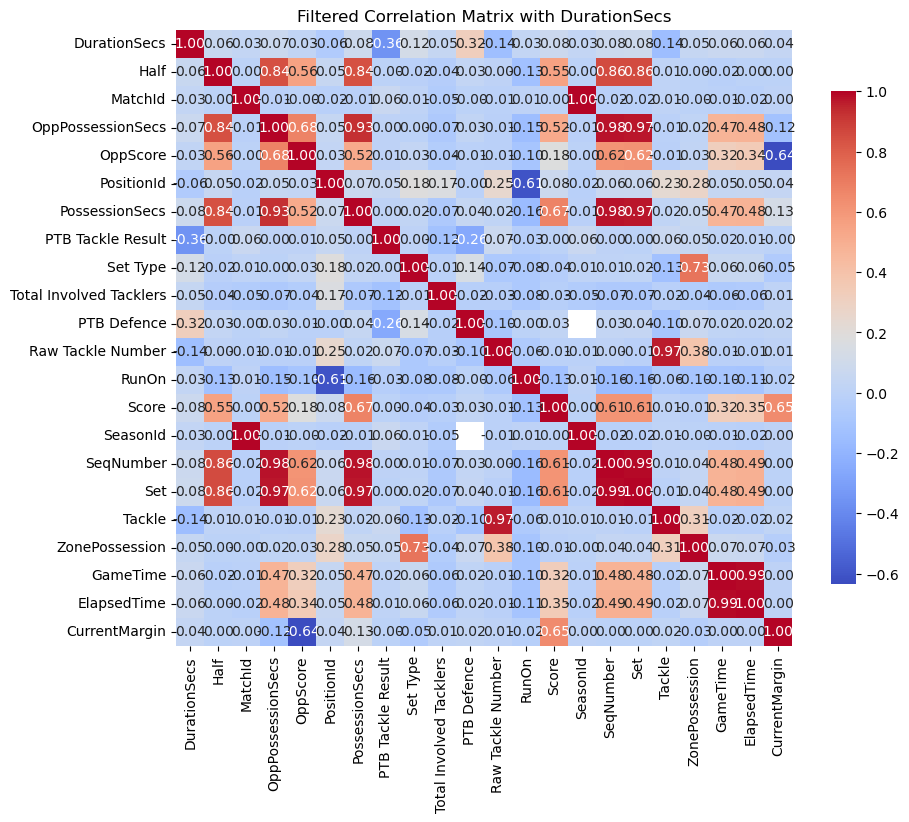

In [42]:
df = pd.DataFrame(ptb_data)
df = df.drop(['TotalPossessionSecs'],axis = 1)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
threshold = 0.02  # Adjust based on significance
relevant_vars = correlation_matrix['DurationSecs'][correlation_matrix['DurationSecs'].abs() > threshold].index.tolist()
filtered_correlation_matrix = correlation_matrix.loc[relevant_vars, relevant_vars]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Filtered Correlation Matrix with DurationSecs')
plt.show()